In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import requests
import pandas as pd
import os
import requests

def download_file(url, filename):
    ''' Downloads file from the url and save it as filename '''
    # check if file already exists
    if not os.path.isfile(filename):
        print('Downloading File')
        response = requests.get(url)
        # Check if the response is ok (200)
        if response.status_code == 200:
            # Open file and write the content
            with open(filename, 'wb') as file:
                # A chunk of 128 bytes
                for chunk in response:
                    file.write(chunk)

In [14]:
download_file("http://api.worldbank.org/v2/en/indicator/SP.DYN.CBRT.IN?downloadformat=excel","worldbank.xls")


birth_rates = pd.read_excel("worldbank.xls")
birth_rates = birth_rates.drop([0,1], axis=0)
birth_rates

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000000,1961.000000,1962.000000,1963.000000,1964.000000,1965.000000,...,2008.000000,2009.000000,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.0
3,Aruba,ABW,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,35.679000,34.529000,33.320000,32.050000,30.737000,29.413000,...,11.589000,11.407000,11.260000,11.147000,11.065000,11.008000,10.975000,10.963000,10.974000,NaN
4,Afghanistan,AFG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,51.293000,51.395000,51.488000,51.572000,51.644000,51.700000,...,41.697000,40.474000,39.232000,38.016000,36.863000,35.797000,34.836000,33.980000,33.214000,NaN
5,Angola,AGO,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,55.035000,54.773000,54.509000,54.235000,53.956000,53.691000,...,46.459000,45.910000,45.314000,44.688000,44.058000,43.446000,42.864000,42.321000,41.819000,NaN
6,Albania,ALB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,40.925000,40.369000,39.628000,38.724000,37.696000,36.599000,...,11.933000,11.837000,11.819000,11.846000,11.888000,11.916000,11.914000,11.879000,11.816000,NaN
7,Andorra,AND,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.400000,9.900000,9.800000,NaN,9.500000,NaN,NaN,NaN,8.800000,NaN
8,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,47.689955,47.468025,47.245496,47.014786,46.770214,46.502229,...,27.486639,27.535705,27.564317,27.532156,27.412583,27.190502,26.860505,26.431200,25.927766,NaN
9,United Arab Emirates,ARE,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,47.163000,46.588000,45.963000,45.285000,44.546000,43.703000,...,12.521000,12.073000,11.656000,11.265000,10.895000,10.540000,10.202000,9.885000,9.592000,NaN
10,Argentina,ARG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,23.682000,23.459000,23.242000,23.038000,22.857000,22.709000,...,18.417000,18.285000,18.154000,18.019000,17.875000,17.717000,17.547000,17.364000,17.172000,NaN
11,Armenia,ARM,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,38.509000,37.217000,35.561000,33.629000,31.540000,29.447000,...,15.026000,15.099000,15.065000,14.928000,14.713000,14.446000,14.141000,13.808000,13.456000,NaN


In [15]:
birth_rates.columns = birth_rates.iloc[0]
birth_rates = birth_rates.drop([2], axis=0)

birth_rates

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
3,Aruba,ABW,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,35.679000,34.529000,33.320000,32.050000,30.737000,29.413000,...,11.589000,11.407000,11.260000,11.147000,11.065000,11.008000,10.975000,10.963000,10.974000,NaN
4,Afghanistan,AFG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,51.293000,51.395000,51.488000,51.572000,51.644000,51.700000,...,41.697000,40.474000,39.232000,38.016000,36.863000,35.797000,34.836000,33.980000,33.214000,NaN
5,Angola,AGO,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,55.035000,54.773000,54.509000,54.235000,53.956000,53.691000,...,46.459000,45.910000,45.314000,44.688000,44.058000,43.446000,42.864000,42.321000,41.819000,NaN
6,Albania,ALB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,40.925000,40.369000,39.628000,38.724000,37.696000,36.599000,...,11.933000,11.837000,11.819000,11.846000,11.888000,11.916000,11.914000,11.879000,11.816000,NaN
7,Andorra,AND,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.400000,9.900000,9.800000,NaN,9.500000,NaN,NaN,NaN,8.800000,NaN
8,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,47.689955,47.468025,47.245496,47.014786,46.770214,46.502229,...,27.486639,27.535705,27.564317,27.532156,27.412583,27.190502,26.860505,26.431200,25.927766,NaN
9,United Arab Emirates,ARE,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,47.163000,46.588000,45.963000,45.285000,44.546000,43.703000,...,12.521000,12.073000,11.656000,11.265000,10.895000,10.540000,10.202000,9.885000,9.592000,NaN
10,Argentina,ARG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,23.682000,23.459000,23.242000,23.038000,22.857000,22.709000,...,18.417000,18.285000,18.154000,18.019000,17.875000,17.717000,17.547000,17.364000,17.172000,NaN
11,Armenia,ARM,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,38.509000,37.217000,35.561000,33.629000,31.540000,29.447000,...,15.026000,15.099000,15.065000,14.928000,14.713000,14.446000,14.141000,13.808000,13.456000,NaN
12,American Samoa,ASM,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.700000,NaN,NaN,NaN,17.500000,NaN,NaN,NaN


In [16]:
birth_rates =birth_rates.pivot_table(
                                index='Country Name'
                                )
birth_rates

2,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,51.293000,51.395000,51.488000,51.572000,51.644000,51.700000,51.736000,51.749000,51.738000,51.704000,...,42.860000,41.697000,40.474000,39.232000,38.016000,36.863000,35.797000,34.836000,33.980000,33.214000
Albania,40.925000,40.369000,39.628000,38.724000,37.696000,36.599000,35.494000,34.431000,33.451000,32.579000,...,12.129000,11.933000,11.837000,11.819000,11.846000,11.888000,11.916000,11.914000,11.879000,11.816000
Algeria,49.671000,49.576000,49.416000,49.181000,48.877000,48.524000,48.155000,47.804000,47.494000,47.232000,...,22.555000,23.425000,24.189000,24.762000,25.078000,25.134000,24.945000,24.522000,23.900000,23.132000
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,18.700000,NaN,NaN,NaN,17.500000,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.100000,10.400000,9.900000,9.800000,NaN,9.500000,NaN,NaN,NaN,8.800000
Angola,55.035000,54.773000,54.509000,54.235000,53.956000,53.691000,53.469000,53.317000,53.250000,53.270000,...,46.947000,46.459000,45.910000,45.314000,44.688000,44.058000,43.446000,42.864000,42.321000,41.819000
Antigua and Barbuda,34.157000,33.882000,33.658000,33.480000,33.328000,33.165000,32.948000,32.632000,32.180000,31.571000,...,18.260000,17.906000,17.586000,17.308000,17.071000,16.867000,16.684000,16.519000,16.367000,16.225000
Arab World,47.689955,47.468025,47.245496,47.014786,46.770214,46.502229,46.202692,45.871148,45.510739,45.124832,...,27.471884,27.486639,27.535705,27.564317,27.532156,27.412583,27.190502,26.860505,26.431200,25.927766
Argentina,23.682000,23.459000,23.242000,23.038000,22.857000,22.709000,22.602000,22.546000,22.547000,22.610000,...,18.553000,18.417000,18.285000,18.154000,18.019000,17.875000,17.717000,17.547000,17.364000,17.172000


Text(0.5,0,'Year')

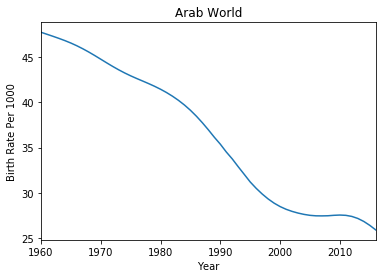

In [20]:
country_name = 'Arab World'
row = birth_rates.loc[country_name]

row.plot()
plt.title(country_name)
plt.ylabel("Birth Rate Per 1000")
plt.xlabel("Year")





In [18]:
countries = birth_rates.index.values
